In [1]:
import pandas as pd

data = pd.read_csv('cirrhosis.csv')
data



,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [2]:
data.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [2]:
data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

### Since the dataset is small, we can't get rid of the NA values instead we'll impute the missing entries with some statistical calculations

In [3]:
# For Numerical data
data.select_dtypes(include = (['int64','float64'])).isna().sum()

# displays the no. of missing numeric values

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [4]:
# select the column
data_num_col = data.select_dtypes(include=['int64', 'float64']).columns

# fill in the missing columns with its median
for c in data_num_col:
  data[c].fillna(data[c].median(), inplace = True)

data.select_dtypes(include = (['int64','float64'])).isna().sum()

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [5]:
# For categorical values
data.select_dtypes(include = (['object'])).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [6]:
data_cat_col = data.select_dtypes(include=('object')).columns
for c in data_cat_col:
    data[c].fillna(data[c].mode().values[0], inplace=True)

data.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [7]:
data.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [8]:
# replacing catagorical data with integers.
data['Sex'] = data['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
data['Ascites'] = data['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
data['Drug'] = data['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1
data['Hepatomegaly'] = data['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
data['Spiders'] = data['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
data['Edema'] = data['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
data['Status'] = data['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

### Dimensionality Reduction using UMAP

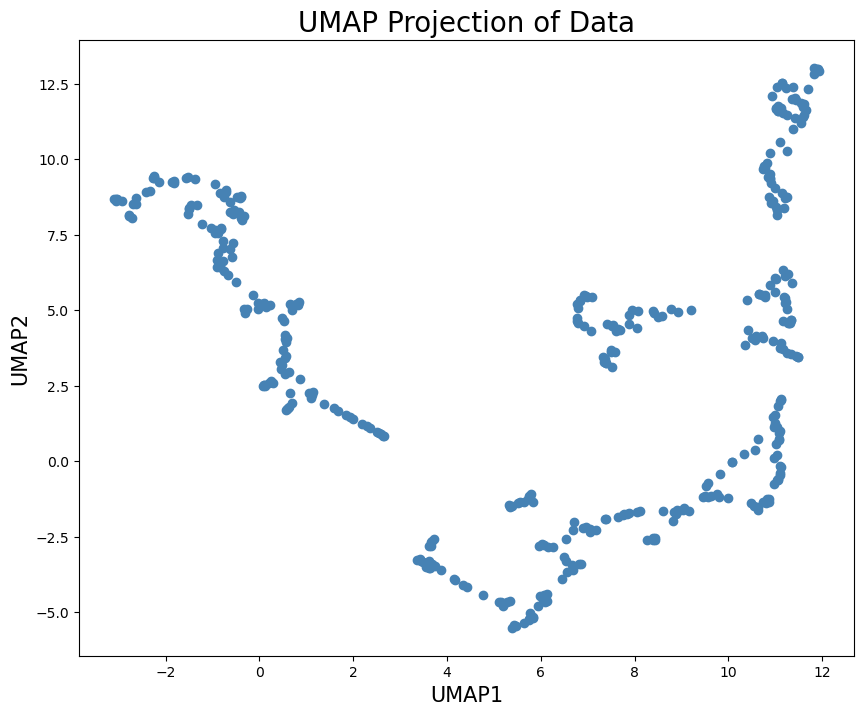

In [9]:
from umap import UMAP
import matplotlib.pyplot as plt

# Initialize UMAP with 2 components (2 dimensions)
umap_model = UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42)

# Fit the UMAP model to your data
umap_result = umap_model.fit_transform(data)

# Create a new DataFrame with the UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# You can now visualize the UMAP results, for example, as a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], color = 'steelblue')
plt.title('UMAP Projection of Data',fontsize = 20)
plt.xlabel('UMAP1',fontsize = 15)
plt.ylabel('UMAP2',fontsize = 15)
plt.show()



In [11]:
umap_df.columns

Index(['UMAP1', 'UMAP2'], dtype='object')

### Visualizing clusters obtained by DBSCAN on the UMAP embeddings

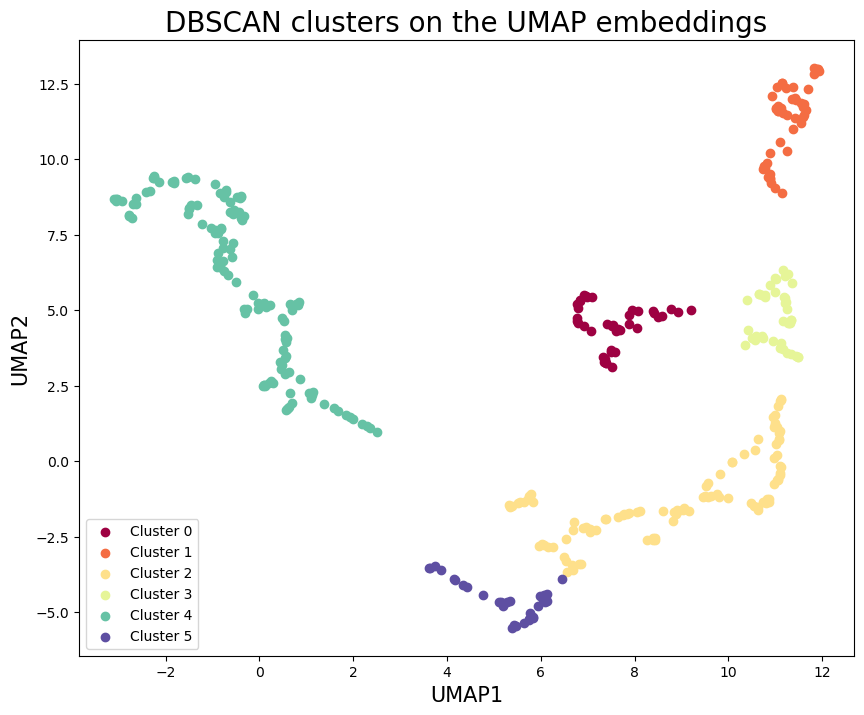

Number of Valid Clusters: 6
Silhouette Score: 0.5321934223175049


In [28]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=30)  

# Fit DBSCAN to the UMAP embedding
cluster_labels = dbscan.fit_predict(umap_df)

# Find unique cluster labels (including noise points labeled as -1)
unique_labels, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Filter out noise points (-1) and clusters with less than 30 data points
valid_clusters = unique_labels[cluster_counts >= 30]

# Filter data points belonging to valid clusters
valid_data_points = umap_df[np.isin(cluster_labels, valid_clusters)]

# Create a colormap for plotting clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(valid_clusters)))

# Create a scatter plot for each valid cluster
plt.figure(figsize=(10, 8))
for i, cluster_label in enumerate(valid_clusters):
    cluster_points = umap_result[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', color=colors[i])

plt.title('DBSCAN clusters on the UMAP embeddings',fontsize = 20)
plt.xlabel('UMAP1',fontsize = 15)
plt.ylabel('UMAP2',fontsize = 15)
plt.legend()
plt.show()

# Calculate the Silhouette score for the valid clusters
if len(valid_clusters) > 1:
    silhouette_avg = silhouette_score(valid_data_points, cluster_labels[np.isin(cluster_labels, valid_clusters)])
    print(f"Number of Valid Clusters: {len(valid_clusters)}")
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Not enough valid clusters to calculate Silhouette Score.")

    

In [29]:
print("unique_labels:",unique_labels)
print("cluster_counts:",cluster_counts)
sum(cluster_counts)

unique_labels: [-1  0  1  2  3  4  5]
cluster_counts: [ 26  40  49 103  41 128  31]


418

In [19]:
print("Marks for the assignment:",min(10, len(valid_clusters) + 10*silhouette_avg))

Marks for the assignment: 10
